# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Lital Porat 206571846
<br>
Student 2: Shir Lavi 315243394

## Fashion MNIST with Keras
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://cloudxlab.com/blog/wp-content/uploads/2019/06/Tensorflow_Keras.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

## Load Dataset

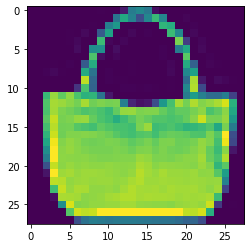

8


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[100])
plt.show()
print(y_train[100])

## Data preprocessing

### Feature scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

### Select two classes

[1]


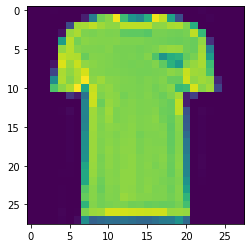

In [ ]:
train_y = []
train_x = []

for i in range (len(y_train)):
  if y_train[i]==0 or y_train[i]==1:
    train_y.append(y_train[i])
    train_x.append(X_train[i])

test_y = []
test_x = []

for i in range (len(y_test)):
  if y_test[i]==0 or y_test[i]==1:
    test_y.append(y_test[i])
    test_x.append(X_test[i])

train_x=np.array(train_x)
test_x=np.array(test_x)
train_y=np.array(train_y).reshape(12000,1)
test_y=np.array(test_y).reshape(2000,1)
trainX, val_x = train_x[:int(len(train_x)*0.8)] , train_x[int(len(train_x)*0.8):]
trainY, val_y = train_y[:int(len(train_y)*0.8)] , train_y[int(len(train_y)*0.8):]


print(test_y[0])
plt.imshow(test_x[100])
plt.show()


We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
from keras.utils import np_utils

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential() # Declare a Sequential model 
model.add(Dense(128, input_shape=(28,28)))
model.add(Activation('sigmoid')) # Apply sigmoid activation function to the layer output
model.add(Dense(128)) # Add a hidden layer of 512 units
model.add(Activation('sigmoid'))
model.add(Flatten())
model.add(Dense(1)) # Add an output layer of  
model.add(Activation('sigmoid')) # The "sigmoid" activation ensures the output is a valid probability distribution
print(model.output_shape)

(None, 1)


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
history = model.fit(trainX, trainY, batch_size=128, epochs=25, validation_data=(val_x,val_y))

Epoch 1/25
75/75 [==============================] - 1s 6ms/step - loss: 0.8635 - accuracy: 0.5340 - val_loss: 0.5025 - val_accuracy: 0.7150
Epoch 2/25
75/75 [==============================] - 0s 4ms/step - loss: 0.2410 - accuracy: 0.9184 - val_loss: 0.1316 - val_accuracy: 0.9575
Epoch 3/25
75/75 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9555 - val_loss: 0.0839 - val_accuracy: 0.9700
Epoch 4/25
75/75 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9766 - val_loss: 0.0495 - val_accuracy: 0.9846
Epoch 5/25
75/75 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.0419 - val_accuracy: 0.9871
Epoch 6/25
75/75 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9882 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 7/25
75/75 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 8/25
75/75 [==

### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
weights = model.get_weights()
print(weights)

[array([[-0.14470991,  0.04871702,  0.1664196 , ..., -0.8259993 ,
        -0.18235856, -0.3562818 ],
       [-0.78977656, -1.0963752 , -0.3086302 , ..., -0.9555572 ,
        -0.28941974, -1.0337877 ],
       [-0.17246874, -1.6896504 , -0.9163736 , ..., -0.9898973 ,
         0.22602873, -0.8500854 ],
       ...,
       [ 0.21143538, -1.6787596 ,  0.02075325, ..., -0.7907405 ,
        -0.01069603, -0.31081125],
       [-0.30668557, -2.0358832 ,  0.13193193, ..., -0.9892575 ,
        -0.3559074 , -0.41749254],
       [-0.4704456 , -0.8029055 ,  1.0821457 , ..., -0.8944036 ,
        -0.9643141 , -0.18363881]], dtype=float32), array([-0.14440572,  0.0905946 , -0.12253226,  0.1007637 ,  0.03940178,
        0.01197319, -0.02846965, -0.18577228, -0.13182442, -0.1154489 ,
        0.19046077, -0.21332714, -0.3502689 , -0.23774539, -0.14794436,
       -0.1544012 , -0.24268733, -0.25591797, -0.21724379, -0.22138634,
       -0.21921769, -0.19610177, -0.24911118, -0.00063816, -0.06457276,
       -0.

### Loss and Accuracy Visualization
Show  on plot the lose during training

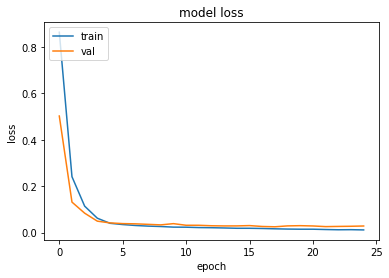

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

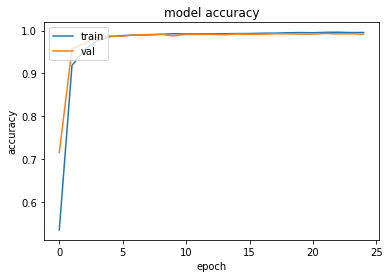

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_x)
predictions = np.zeros((1,test_y.shape[0]))
labels = np.zeros((1,test_y.shape[0]))

# Check your predictions against the test's labels
for i in range(test_y.shape[0]):
  if (y_pred[i,0] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = test_y[i]
print(f"accuracy: {accuracy_score(labels.T,predictions.T).round(3)*100}%")

63/63 [==============================] - 0s 2ms/step
accuracy: 99.0%


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

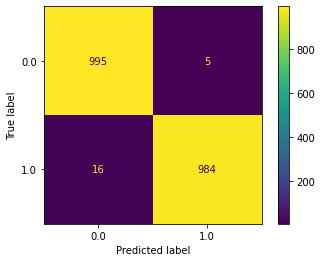

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(labels.T,predictions.T)
plt.show()

---
<br>


# Neural Network with Tensorflow Keras part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Dataset

4422102/4422102 [==============================] - 0s 0us/step


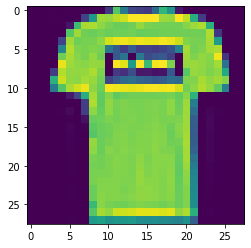

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[1])
plt.show()

In [ ]:
x_train = X_train / 255.0
x_test = X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
ytest = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_test = y_test.reshape(10000,1)


train_y=[]
test_y=[]
trainX, val_x = x_train[:int(len(x_train)*0.8)] , x_train[int(len(x_train)*0.8):]
trainY, val_y = y_train[:int(len(y_train)*0.8)] , y_train[int(len(y_train)*0.8):]

### The rest you will have to create yourself...

## Models

In [ ]:
def loss_accuracy(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

### Base Model

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6059 - accuracy: 0.7976 - val_loss: 0.4395 - val_accuracy: 0.8457
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4099 - accuracy: 0.8576 - val_loss: 0.3974 - val_accuracy: 0.8586
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3767 - accuracy: 0.8692 - val_loss: 0.3867 - val_accuracy: 0.8610
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3586 - accuracy: 0.8745 - val_loss: 0.3693 - val_accuracy: 0.8710
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8780 - val_loss: 0.3547 - val_accuracy: 0.8754
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8819 - val_loss: 0.3511 - val_accuracy: 0.8762
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8854 - val_loss: 0.3462 - val_accuracy: 0.8778
Epoch 

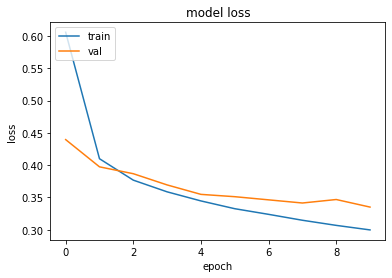

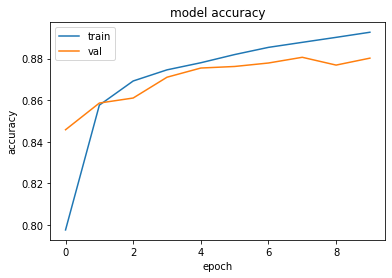

In [ ]:
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.01)
# Define the model
baseModel = tf.keras.models.Sequential()
baseModel.add(tf.keras.layers.Dense(64, input_shape=(28, 28), activation='relu'))
baseModel.add(Flatten())
baseModel.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
baseModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = baseModel.fit(trainX, trainY, epochs=10, batch_size=128, validation_data=(val_x,val_y))
loss_accuracy(history)


### Experiment number 1

Adding layer

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5260 - accuracy: 0.8162 - val_loss: 0.3704 - val_accuracy: 0.8692
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3367 - accuracy: 0.8766 - val_loss: 0.3240 - val_accuracy: 0.8827
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2895 - accuracy: 0.8941 - val_loss: 0.3253 - val_accuracy: 0.8823
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2608 - accuracy: 0.9024 - val_loss: 0.3064 - val_accuracy: 0.8907
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2344 - accuracy: 0.9126 - val_loss: 0.3051 - val_accuracy: 0.8878
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2157 - accuracy: 0.9200 - val_loss: 0.2944 - val_accuracy: 0.8948
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1972 - accuracy: 0.9259 - val_loss: 0.3017 - val_accuracy: 0.8943
Epoch 

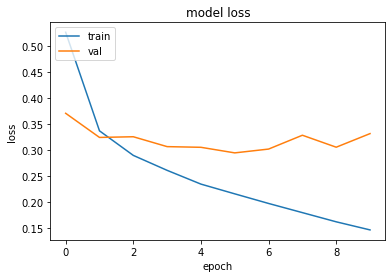

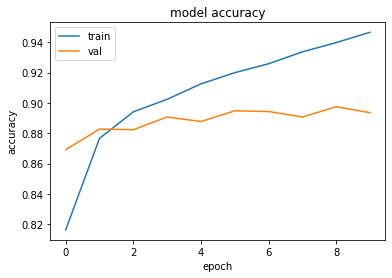

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(512, input_shape=(28, 28), activation='relu'))
model1.add(Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(trainX, trainY, epochs=10, batch_size=128,  validation_data=(val_x,val_y))
loss_accuracy(history)

### Experiment number 2

Adding epochs

Epoch 1/40
188/188 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.7908 - val_loss: 0.4455 - val_accuracy: 0.8468
Epoch 2/40
188/188 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.8578 - val_loss: 0.3941 - val_accuracy: 0.8608
Epoch 3/40
188/188 [==============================] - 1s 5ms/step - loss: 0.3746 - accuracy: 0.8700 - val_loss: 0.3838 - val_accuracy: 0.8628
Epoch 4/40
188/188 [==============================] - 1s 5ms/step - loss: 0.3566 - accuracy: 0.8751 - val_loss: 0.3647 - val_accuracy: 0.8717
Epoch 5/40
188/188 [==============================] - 1s 5ms/step - loss: 0.3400 - accuracy: 0.8804 - val_loss: 0.3505 - val_accuracy: 0.8771
Epoch 6/40
188/188 [==============================] - 1s 4ms/step - loss: 0.3276 - accuracy: 0.8840 - val_loss: 0.3469 - val_accuracy: 0.8776
Epoch 7/40
188/188 [==============================] - 1s 5ms/step - loss: 0.3190 - accuracy: 0.8884 - val_loss: 0.3409 - val_accuracy: 0.8785
Epoch 

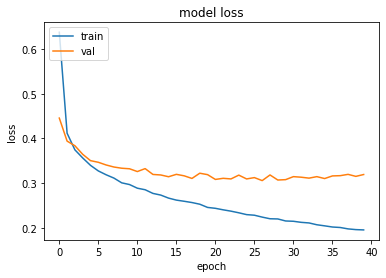

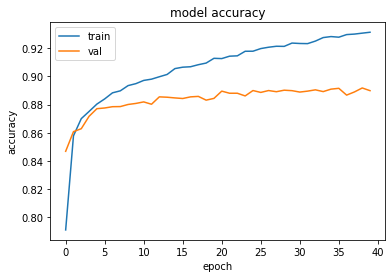

In [ ]:
# Define the model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(128, input_shape=(28, 28), activation='relu'))
model2.add(Flatten())
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(trainX, trainY, epochs=40, batch_size=256,verbose=1,  validation_data=(val_x,val_y))
loss_accuracy(history)
# print('Validation accuracy:', test_acc)

## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

313/313 [==============================] - 1s 2ms/step
	base result:
	accuracy: 87.4%
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.83      0.79      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.75      0.56      0.64      1000
           7       0.92      0.97      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



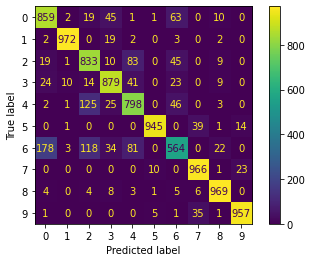

	model1 result:
	accuracy: 89.2%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.90      0.81      1000
           3       0.88      0.91      0.90      1000
           4       0.91      0.72      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.74      0.66      0.70      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



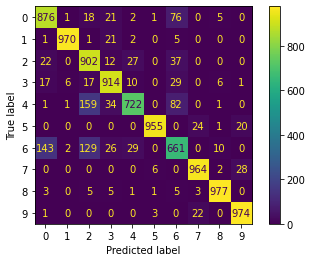

	model2 result:
	accuracy: 88.5%
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.79      0.84      0.82      1000
           3       0.91      0.85      0.88      1000
           4       0.77      0.87      0.82      1000
           5       0.98      0.95      0.97      1000
           6       0.77      0.58      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



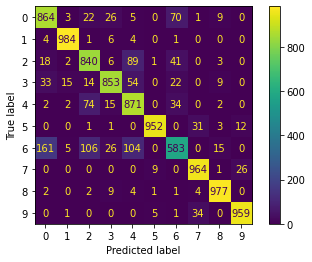

In [ ]:

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay

baseResult = baseModel.predict(x_test)
result1 = model1.predict(x_test)
result2 = model2.predict(x_test)


def resultFunc(result):
  predictions = np.zeros((y_test.shape[0],1))
  for i in range(10000):
    max = 0
    for j in range(10):
      if result[i][j]>max:
        max=result[i][j]
        predictions[i,0]=j
  print(f"\taccuracy: {accuracy_score(y_test,predictions).round(3)*100}%")
  ConfusionMatrixDisplay.from_predictions(y_test,predictions)
  print(classification_report(y_test,predictions, labels=range(0,10)))
  plt.show()


print("\tbase result:")
resultFunc(baseResult)
print("\tmodel1 result:")
resultFunc(result1)
print("\tmodel2 result:")
resultFunc(result2)


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from numpy import load as load_npy
from google.colab import files
files.upload()

Saving Shirt_6.npy to Shirt_6.npy


{'Shirt_6.npy': b"\x93NUMPY\x01\x00v\x00{'descr': '|u1', 'fortran_order': False, 'shape': (28, 28), }                                                        \n\x00\x00\x00\x02\x00\x01\x01\x00\x00\x00\x009CILLS>\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x01\x01\x00\x00\rO\x80\xc9\xa2\xa1\xad\xc0\xac\xb5\xb8l\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00f\x8b\x8egs\xa2\x9a\xa5\x99\x8b\x81\x96\x8a\xab\xa1\x1a\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00j|lgj]d\xb4\x9c\x93\x8aU\x9dr|\x9a\x9d\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x1d\x86eqlatQ\x92\xb7\xa4o\x92\x83z\x84\x91\xa9]\x00\x01\x00\x00\x00\x00\x00\x00\x00A\x83ieldhaJ\xce\xaes\x96lw\x92\x98\xa2\x8d\x00\x00\x00\x00\x00\x00\x00\x00\x00l{pjbdeoH\x88\x84psm\x8e\x96\xa0\xa2\xc3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x87zwpS]ajs[mSm}\xa5\x8c\xc1\xa0\xb0\x06\x00\x00\x00\x00\x00\x00\x00\x17\x87\x84\x95hN`agllsTr\x95\x9e\x93\xd1\xa0\xb24\x00\x00\x00\x00\x00\x00\x009|\x83\xa0g`emmolrjq\x9c\xa3\x9c\xc4\xa7\xaeU\x00\x00

In [ ]:
img = load_npy('/content/Shirt_6.npy') 
img = img/255
test_image_as_batch = np.expand_dims(img, axis = 0)
baseRes = baseModel.predict(test_image_as_batch)
Res1 = model1.predict(test_image_as_batch)
Res2 = model2.predict(test_image_as_batch)

def oneRes(result):
  maxi=0;
  for i in range(10):
    if(result[0][i]>maxi):
      maxi=result[0][i]
      index=i
    if index ==0:
      prediction = 'T-shirt/top'
    elif index==1:
      prediction = 'Trouser'
    elif index==2:
      prediction = 'Pullover'
    elif index==3:
      prediction = 'Dress'
    elif index==4:
      prediction = 'Coat'
    elif index==5:
      prediction = 'Sandal'
    elif index==6:
      prediction = 'Shirt'
    elif index==7:
      prediction = 'Sneaker'
    elif index==8:
      prediction = 'Bag'
    else:
      prediction="Ankle boot"
  print(prediction)

oneRes(baseRes)
oneRes(Res1)
oneRes(Res2)

1/1 [==============================] - 0s 17ms/step
Shirt
Shirt
T-shirt/top
